In [1]:
import pysal

/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
pysal.__version__

'2.1.0'

In [3]:
%matplotlib inline

## Markov Chains

In [4]:
import numpy as np

In [5]:
c = np.array([['b','a','c'],['c','c','a'],['c','b','c'],['a','a','b'],['a','b','c']])

In [6]:
c

array([['b', 'a', 'c'],
       ['c', 'c', 'a'],
       ['c', 'b', 'c'],
       ['a', 'a', 'b'],
       ['a', 'b', 'c']], dtype='<U1')

In [7]:
from pysal.explore.giddy.markov import Markov

In [8]:
c_markov = Markov(c)

In [9]:
dir(c_markov)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'classes',
 'p',
 'steady_state',
 'transitions']

In [10]:
c_markov.classes

array(['a', 'b', 'c'], dtype='<U1')

In [11]:
c_markov.transitions

array([[1., 2., 1.],
       [1., 0., 2.],
       [1., 1., 1.]])

In [12]:
c_markov.p

array([[0.25      , 0.5       , 0.25      ],
       [0.33333333, 0.        , 0.66666667],
       [0.33333333, 0.33333333, 0.33333333]])

In [13]:
from pysal.lib import examples
from pysal.lib import io

In [14]:
f = io.open(examples.get_path("usjoin.csv"))
pci = np.array([f.by_col[str(y)] for y in range(1929,2010)])
print(pci.shape)

(81, 48)


Text(0.5, 1.0, 'Absolute Dynamics')

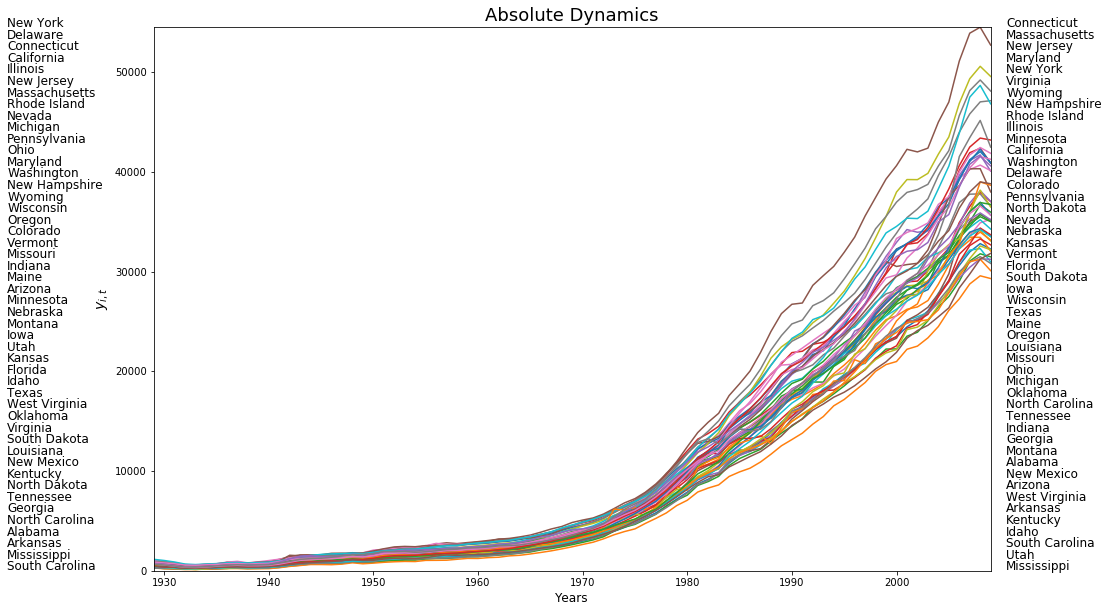

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
years = range(1929,2010)
names = np.array(f.by_col("Name"))
order1929 = np.argsort(pci[0,:])
order2009 = np.argsort(pci[-1,:])
names1929 = names[order1929[::-1]]
names2009 = names[order2009[::-1]]
first_last = np.vstack((names1929,names2009))
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.plot(years,pci)
for i in range(48):
    plt.text(1915,54530-(i*1159), first_last[0][i],fontsize=12)
    plt.text(2010.5,54530-(i*1159), first_last[1][i],fontsize=12)
plt.xlim((years[0], years[-1]))
plt.ylim((0, 54530))
plt.ylabel(r"$y_{i,t}$",fontsize=14)
plt.xlabel('Years',fontsize=12)
plt.title('Absolute Dynamics',fontsize=18)


Text(0.5, 1.0, 'Relative Dynamics')

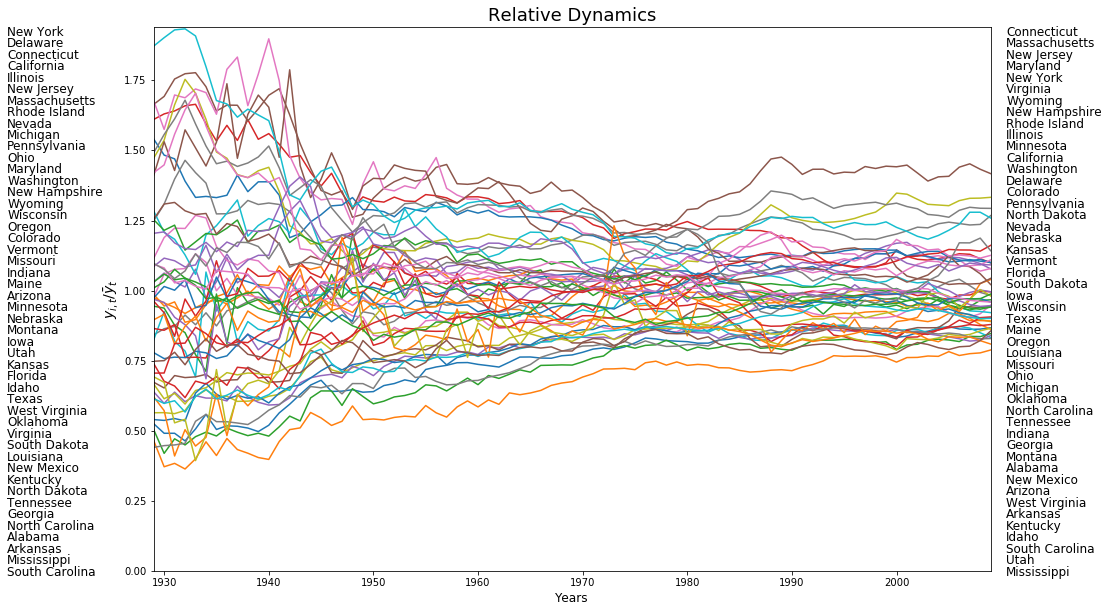

In [16]:
years = range(1929,2010)
rpci= (pci.T / pci.mean(axis=1)).T
names = np.array(f.by_col("Name"))
order1929 = np.argsort(rpci[0,:])
order2009 = np.argsort(rpci[-1,:])
names1929 = names[order1929[::-1]]
names2009 = names[order2009[::-1]]
first_last = np.vstack((names1929,names2009))
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.plot(years,rpci)
for i in range(48):
    plt.text(1915,1.91-(i*0.041), first_last[0][i],fontsize=12)
    plt.text(2010.5,1.91-(i*0.041), first_last[1][i],fontsize=12)
plt.xlim((years[0], years[-1]))
plt.ylim((0, 1.94))
plt.ylabel(r"$y_{i,t}/\bar{y}_t$",fontsize=14)
plt.xlabel('Years',fontsize=12)
plt.title('Relative Dynamics',fontsize=18)

In [17]:
from pysal.viz import mapclassify as mc
q5 = np.array([mc.Quantiles(y,k=5).yb for y in pci]).transpose()
print(q5[:, 0])

[0 2 0 4 2 4 4 1 0 1 4 2 2 1 0 1 2 3 4 4 2 0 2 2 2 4 3 4 0 4 0 0 3 1 3 3 4
 0 1 0 1 2 2 1 3 1 3 3]


In [18]:
print(f.by_col("Name"))

['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [19]:
print(q5[4,:])

[2 3 2 2 3 2 2 3 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 3 3 3 4 3 3 3]


In [20]:
m5 = Markov(q5)

In [21]:
m5.transitions

array([[729.,  71.,   1.,   0.,   0.],
       [ 72., 567.,  80.,   3.,   0.],
       [  0.,  81., 631.,  86.,   2.],
       [  0.,   3.,  86., 573.,  56.],
       [  0.,   0.,   1.,  57., 741.]])

In [22]:
m5.p

array([[0.91011236, 0.0886392 , 0.00124844, 0.        , 0.        ],
       [0.09972299, 0.78531856, 0.11080332, 0.00415512, 0.        ],
       [0.        , 0.10125   , 0.78875   , 0.1075    , 0.0025    ],
       [0.        , 0.00417827, 0.11977716, 0.79805014, 0.07799443],
       [0.        , 0.        , 0.00125156, 0.07133917, 0.92740926]])

In [23]:
m5.steady_state

array([0.20774716, 0.18725774, 0.20740537, 0.18821787, 0.20937187])

In [24]:
from pysal.explore.giddy.ergodic import fmpt
print(fmpt(m5.p))

[[  4.81354357  11.50292712  29.60921231  53.38594954 103.59816743]
 [ 42.04774505   5.34023324  18.74455332  42.50023268  92.71316899]
 [ 69.25849753  27.21075248   4.82147603  25.27184624  75.43305672]
 [ 84.90689329  42.85914824  17.18082642   5.31299186  51.60953369]
 [ 98.41295543  56.36521038  30.66046735  14.21158356   4.77619083]]


## Spatial Dependence and Markov Chains

In [25]:
import geopandas as gpd
import pandas as pd


In [26]:
geo_table = gpd.read_file(examples.get_path('us48.shp'))
income_table = pd.read_csv(examples.get_path("usjoin.csv"))
complete_table = geo_table.merge(income_table,left_on='STATE_NAME',right_on='Name')
complete_table.head()



,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,31528,32053,32206,32934,34984,35738,38477,40782,41588,40619
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,22569,24342,24699,25963,27517,28987,30942,32625,33293,32699
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,25623,27068,27731,28727,30201,30721,32340,33620,34906,35268
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,25068,26118,26770,29109,29676,31644,32856,35882,39009,38672
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,26115,27531,27727,30072,31765,32726,33320,35998,38188,36499


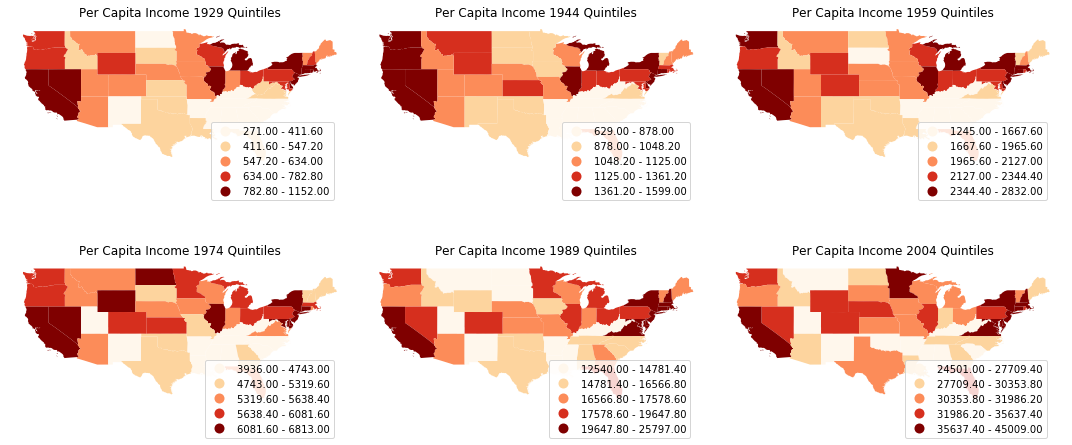

In [27]:
index_year = range(1929,2010,15)
fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (15,7))
for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        complete_table.plot(ax=ax, column=str(index_year[i*3+j]), cmap='OrRd', scheme='quantiles', legend=True)
        ax.set_title('Per Capita Income %s Quintiles'%str(index_year[i*3+j]))
        ax.axis('off')
        leg = ax.get_legend()
        leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
plt.tight_layout()

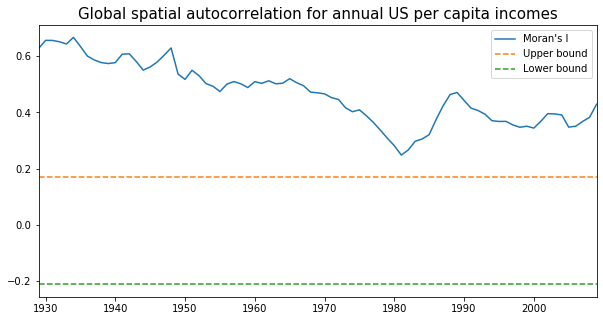

In [28]:
from pysal.explore.esda.moran import Moran
import matplotlib.pyplot as plt
%matplotlib inline
w = io.open(examples.get_path("states48.gal")).read()
w.transform = 'R'
mits = [Moran(cs, w) for cs in pci]
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits])
years = np.arange(1929,2010)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5) )
ax.plot(years, res[:,0], label='Moran\'s I')
#plot(years, res[:,1], label='E[I]')
ax.plot(years, res[:,1]+1.96*res[:,2], label='Upper bound',linestyle='dashed')
ax.plot(years, res[:,1]-1.96*res[:,2], label='Lower bound',linestyle='dashed')
ax.set_title("Global spatial autocorrelation for annual US per capita incomes",fontdict={'fontsize':15})
ax.set_xlim([1929,2009])
ax.legend()


## Spatial Markov

In [29]:
from pysal.explore.giddy.markov import Spatial_Markov

In [30]:
sm = Spatial_Markov(rpci.T, w, fixed = True, k = 5,m=5) 

In [31]:
print(sm.p)

[[0.91461837 0.07503234 0.00905563 0.00129366 0.        ]
 [0.06570302 0.82654402 0.10512484 0.00131406 0.00131406]
 [0.00520833 0.10286458 0.79427083 0.09505208 0.00260417]
 [0.         0.00913838 0.09399478 0.84856397 0.04830287]
 [0.         0.         0.         0.06217617 0.93782383]]


In [32]:
sm.summary()

--------------------------------------------------------------
                     Spatial Markov Test                      
--------------------------------------------------------------
Number of classes: 5
Number of transitions: 3840
Number of regimes: 5
Regime names: LAG0, LAG1, LAG2, LAG3, LAG4
--------------------------------------------------------------
   Test                   LR                Chi-2
  Stat.              170.659              200.624
    DOF                   60                   60
p-value                0.000                0.000
--------------------------------------------------------------
P(H0)           C0         C1         C2         C3         C4
     C0      0.915      0.075      0.009      0.001      0.000
     C1      0.066      0.827      0.105      0.001      0.001
     C2      0.005      0.103      0.794      0.095      0.003
     C3      0.000      0.009      0.094      0.849      0.048
     C4      0.000      0.000      0.000      0.062      

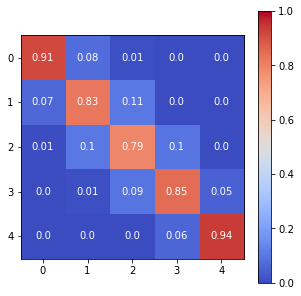

In [33]:
fig, ax = plt.subplots(figsize = (5,5))
im = ax.imshow(sm.p,cmap = "coolwarm",vmin=0, vmax=1)
# Loop over data dimensions and create text annotations.
for i in range(len(sm.p)):
    for j in range(len(sm.p)):
        text = ax.text(j, i, round(sm.p[i, j], 2),
                       ha="center", va="center", color="w")
ax.figure.colorbar(im, ax=ax)

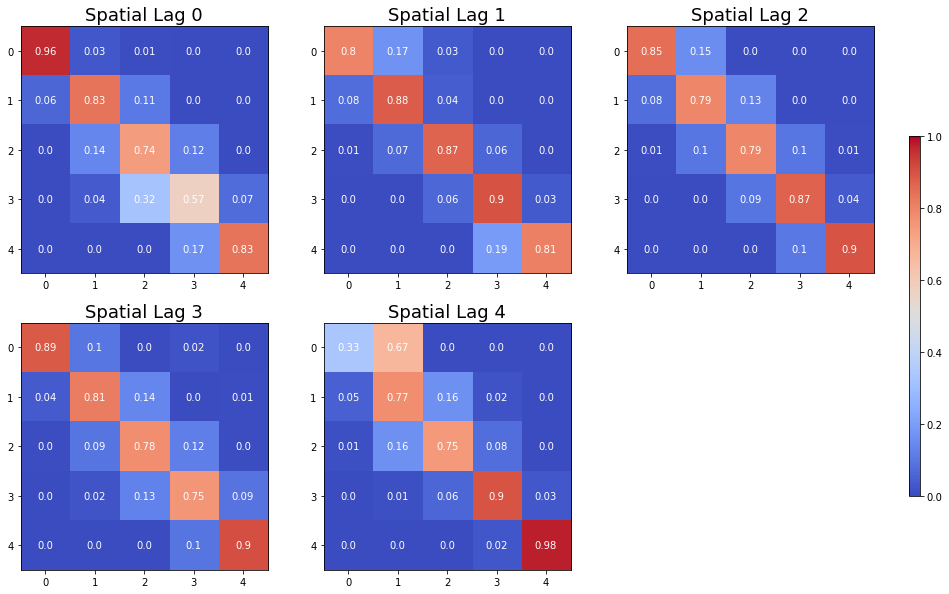

In [34]:
fig, axes = plt.subplots(2,3,figsize = (15,10)) 

for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        if i==1 and j==2:
            ax.axis('off')
            continue
        # Loop over data dimensions and create text annotations.
        p_temp = sm.P[i*3+j]
        for x in range(len(p_temp)):
            for y in range(len(p_temp)):
                text = ax.text(y, x, round(p_temp[x, y], 2),
                               ha="center", va="center", color="w")
        im = ax.imshow(p_temp,cmap = "coolwarm",vmin=0, vmax=1)
        ax.set_title("Spatial Lag %d"%(i*3+j),fontsize=18) 
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.228, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)

### LISA Markov

In [35]:
from pysal.explore.giddy.markov import LISA_Markov
lm = LISA_Markov(pci.T, w)

In [36]:
lm.classes

array([1, 2, 3, 4])

In [37]:
lm.transitions

array([[1.087e+03, 4.400e+01, 4.000e+00, 3.400e+01],
       [4.100e+01, 4.700e+02, 3.600e+01, 1.000e+00],
       [5.000e+00, 3.400e+01, 1.422e+03, 3.900e+01],
       [3.000e+01, 1.000e+00, 4.000e+01, 5.520e+02]])

In [38]:
print(lm.p)

[[0.92985458 0.03763901 0.00342173 0.02908469]
 [0.07481752 0.85766423 0.06569343 0.00182482]
 [0.00333333 0.02266667 0.948      0.026     ]
 [0.04815409 0.00160514 0.06420546 0.88603531]]


In [39]:
print(lm.steady_state)

[0.28561505 0.14190226 0.40493672 0.16754598]


In [40]:
print(fmpt(lm.p))

[[ 3.50121609 37.93025465 40.55772829 43.17412009]
 [31.72800152  7.04710419 28.68182751 49.91485137]
 [52.44489385 47.42097495  2.46952168 43.75609676]
 [38.76794022 51.51755827 26.31568558  5.96851095]]


In [41]:
lm.chi_2

(1058.2079036003051, 0.0, 9)